# Imports

In [5]:
import sklearn
print(sklearn.__version__)

1.0.2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import time

# Data Loading and Pre-Processing

In [2]:
data = pd.read_csv('conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

In [3]:
data

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


In [4]:
data.shape

(273, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [6]:
data = data.drop('Unnamed: 0', axis = 'columns')
data = data.drop('Initial_EDSS', axis = 'columns')
data = data.drop('Final_EDSS', axis = 'columns')
data = data.fillna(data.median(), axis=0)

# EDA

In [7]:
data

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,2


<AxesSubplot:>

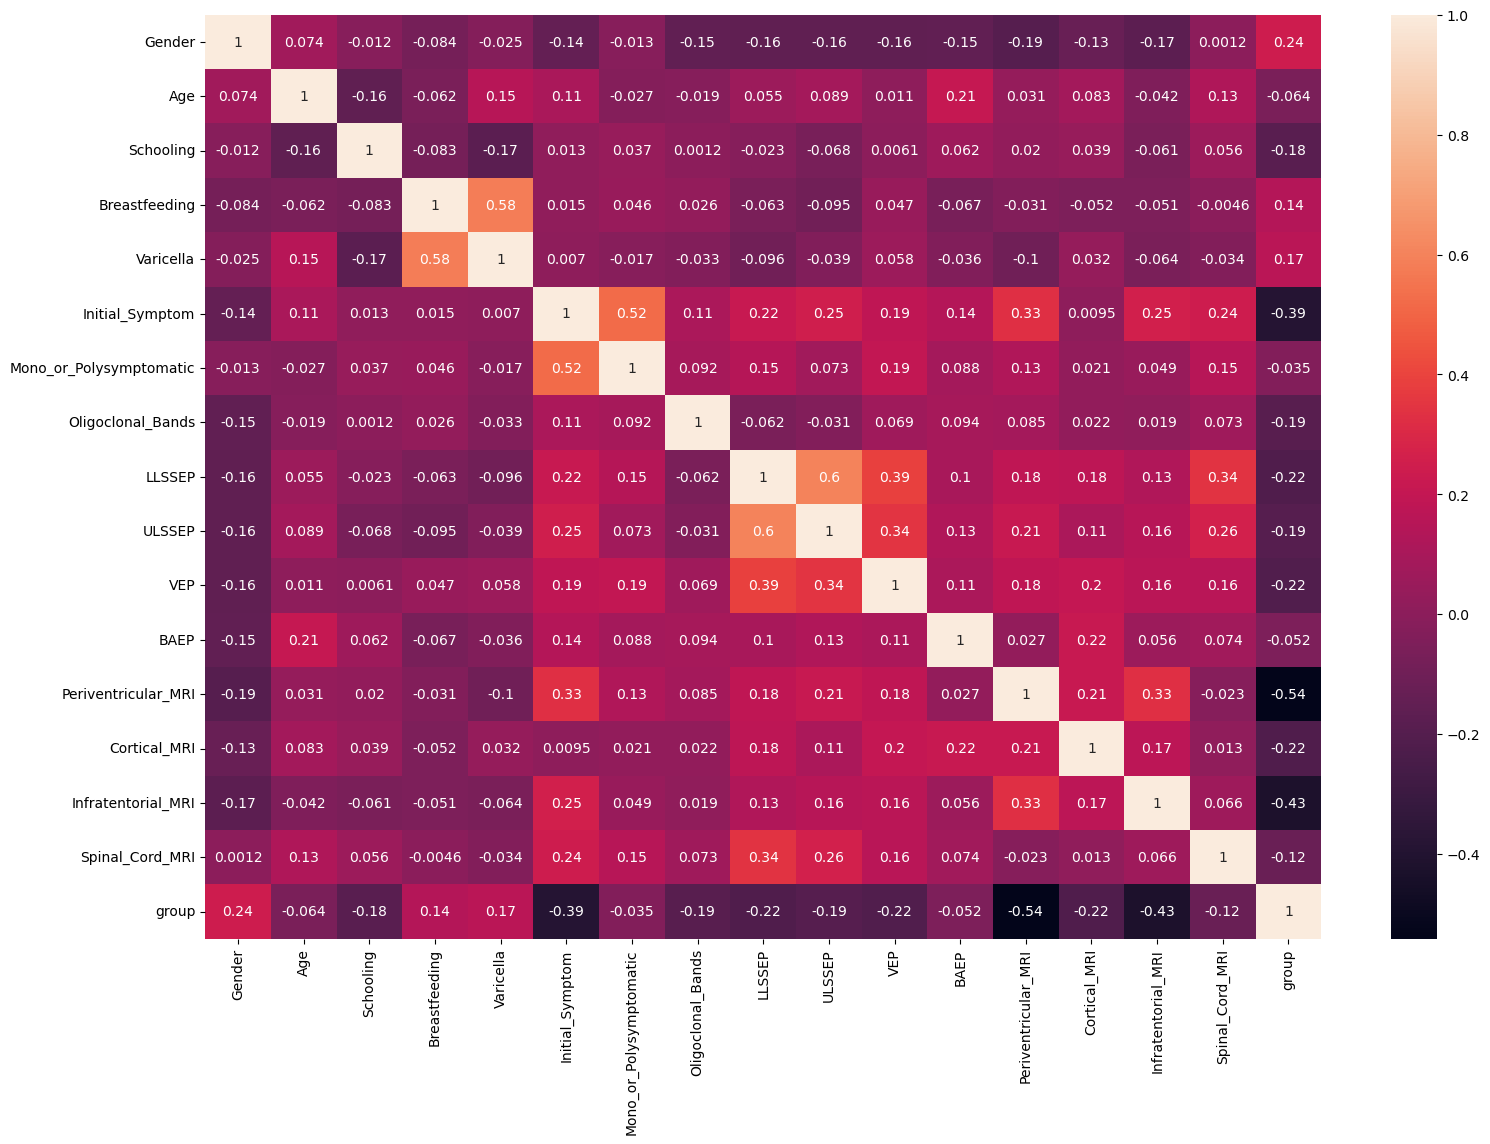

In [8]:
corr = data.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True)

In [11]:
def class_distribution(data, column_name):
    column_data = data[column_name]
    plt.hist(column_data, bins='auto', color='#607c8e')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + column_name)
    plt.show()


In [12]:

def plot_distribution(data, column_name, group_column):
    unique_groups = data[group_column].unique()

    plt.figure(figsize=(8, 6))

    for group in unique_groups:
        group_data = data[data[group_column] == group][column_name]
        plt.hist(group_data, bins='auto', alpha=0.7, label=group)

    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name} by {group_column}')
    plt.legend()

    for group in unique_groups:
        group_data = data[data[group_column] == group][column_name]
        total_count = len(group_data)
        for value in set(group_data):
            count = group_data.tolist().count(value)
            percentage = count / total_count * 100
            plt.text(value, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()


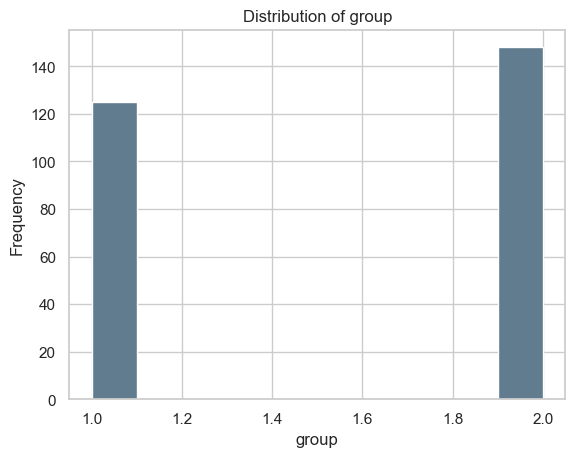

In [18]:
class_distribution(data, 'group')

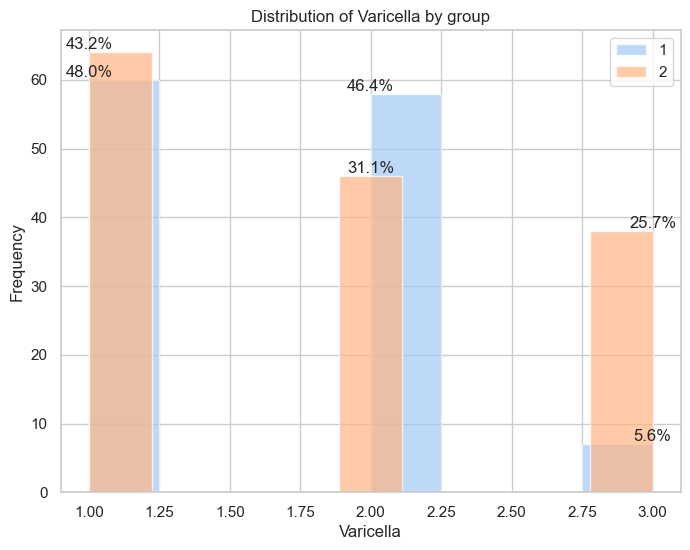

In [19]:
plot_distribution(data, 'Varicella', 'group')

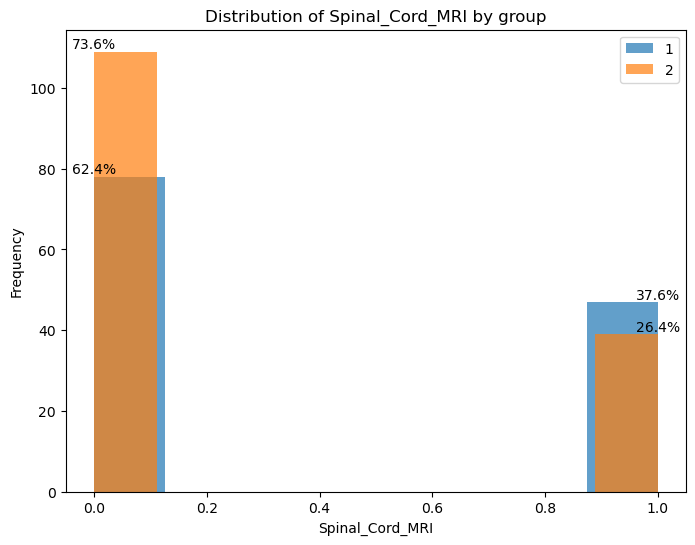

In [14]:
plot_distribution(data, 'Spinal_Cord_MRI', 'group')

In [20]:

cols = ['Gender', 'Varicella', 'Initial_Symptom', 'LLSSEP','ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI']

X = data[cols]
y = data['group']

In [21]:
X.shape

(273, 11)

In [22]:
y.shape

(273,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(218, 11)

In [25]:
X_test.shape

(55, 11)

# Model Development, Training, and Hyperparameter Tuning

In [ ]:

# K-Nearest Neighbors (KNN)
start_time = time.time()
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_grid_search = GridSearchCV(knn, knn_param_grid)
knn_grid_search.fit(X_train, y_train)
knn_predictions = knn_grid_search.predict(X_test)
knn_time = time.time() - start_time

# Naive Bayes
start_time = time.time()
naive_bayes = GaussianNB()
naive_bayes_param_grid = {}
naive_bayes_grid_search = GridSearchCV(naive_bayes, naive_bayes_param_grid)
naive_bayes_grid_search.fit(X_train, y_train)
nb_predictions = naive_bayes_grid_search.predict(X_test)
nb_time = time.time() - start_time

# Random Forest
start_time = time.time()
random_forest = RandomForestClassifier(random_state=42)
rf_param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300], 'max_depth': [None, 2, 5, 7, 10, 15]}
rf_grid_search = GridSearchCV(random_forest, rf_param_grid)
rf_grid_search.fit(X_train, y_train)
rf_predictions = rf_grid_search.predict(X_test)
rf_time = time.time() - start_time

# Support Vector Classifier (SVC)
start_time = time.time()
svc = SVC(random_state=42)
svc_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc_grid_search = GridSearchCV(svc, svc_param_grid)
svc_grid_search.fit(X_train, y_train)
svc_predictions = svc_grid_search.predict(X_test)
svc_time = time.time() - start_time

# Cross-validation scores
knn_scores = cross_val_score(knn_grid_search.best_estimator_, X_train, y_train, cv=10)
nb_scores = cross_val_score(naive_bayes_grid_search.best_estimator_, X_train, y_train, cv=10)
rf_scores = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=10)
svc_scores = cross_val_score(svc_grid_search.best_estimator_, X_train, y_train, cv=10)


# Model Evaluation

K-Nearest Neighbors (KNN) Cross-validation Scores: [0.72727273 0.77272727 0.72727273 0.77272727 0.77272727 0.72727273
 0.86363636 0.86363636 0.66666667 0.71428571]
K-Nearest Neighbors (KNN) Time Taken: 0.20067644119262695 seconds
Naive Bayes Cross-validation Scores: [0.81818182 0.72727273 0.68181818 0.81818182 0.63636364 0.77272727
 0.77272727 0.77272727 0.9047619  0.71428571]
Naive Bayes Time Taken: 0.030994892120361328 seconds
Random Forest Cross-validation Scores: [0.77272727 0.77272727 0.81818182 0.81818182 0.72727273 0.86363636
 0.72727273 0.77272727 0.76190476 0.76190476]
Random Forest Time Taken: 51.31845045089722 seconds
Support Vector Classifier (SVC) Cross-validation Scores: [0.77272727 0.72727273 0.72727273 0.81818182 0.72727273 0.77272727
 0.77272727 0.81818182 0.85714286 0.85714286]
Support Vector Classifier (SVC) Time Taken: 0.25969696044921875 seconds


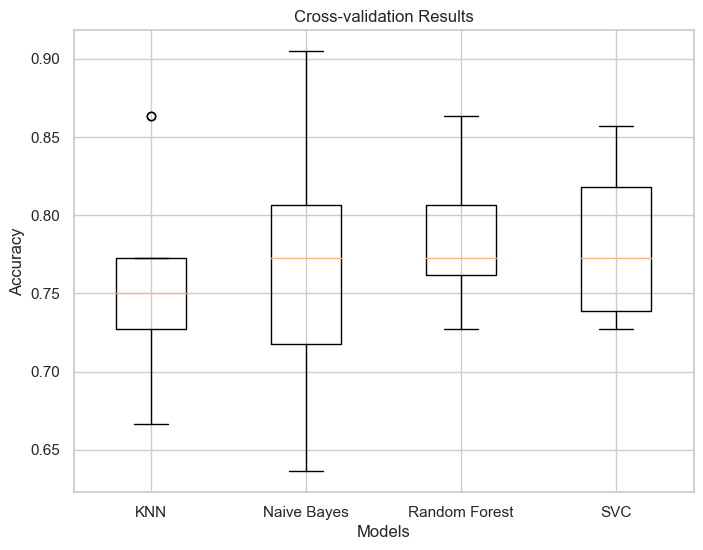

K-Nearest Neighbors (KNN) Results:
Best Parameters: {'n_neighbors': 7}
Accuracy: 0.7090909090909091
Precision: 0.7272727272727273
Recall: 0.6153846153846154
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.62      0.67        26
           2       0.70      0.79      0.74        29

    accuracy                           0.71        55
   macro avg       0.71      0.70      0.70        55
weighted avg       0.71      0.71      0.71        55


Naive Bayes Results:
Best Parameters: {}
Accuracy: 0.7090909090909091
Precision: 0.6785714285714286
Recall: 0.7307692307692307
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.73      0.70        26
           2       0.74      0.69      0.71        29

    accuracy                           0.71        55
   macro avg       0.71      0.71      0.71        55
weighted avg       0.71      0.71      0.71        55


Random Forest 

In [18]:

# Print cross-validation scores and time taken
print("K-Nearest Neighbors (KNN) Cross-validation Scores:", knn_scores)
print("K-Nearest Neighbors (KNN) Time Taken:", knn_time, "seconds")
print("Naive Bayes Cross-validation Scores:", nb_scores)
print("Naive Bayes Time Taken:", nb_time, "seconds")
print("Random Forest Cross-validation Scores:", rf_scores)
print("Random Forest Time Taken:", rf_time, "seconds")
print("Support Vector Classifier (SVC) Cross-validation Scores:", svc_scores)
print("Support Vector Classifier (SVC) Time Taken:", svc_time, "seconds")

# Plot cross-validation results
models = ['KNN', 'Naive Bayes', 'Random Forest', 'SVC']
scores = [knn_scores, nb_scores, rf_scores, svc_scores]

plt.figure(figsize=(8, 6))
plt.boxplot(scores, labels=models)
plt.title('Cross-validation Results')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Evaluate the models
print("K-Nearest Neighbors (KNN) Results:")
print("Best Parameters:", knn_grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions))
print("Recall:", recall_score(y_test, knn_predictions))
print("Classification Report:")
print(classification_report(y_test, knn_predictions))
print()

print("Naive Bayes Results:")
print("Best Parameters:", naive_bayes_grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Precision:", precision_score(y_test, nb_predictions))
print("Recall:", recall_score(y_test, nb_predictions))
print("Classification Report:")
print(classification_report(y_test, nb_predictions))
print()

print("Random Forest Results:")
print("Best Parameters:", rf_grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print()

print("Support Vector Classifier (SVC) Results:")
print("Best Parameters:", svc_grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, svc_predictions))
print("Precision:", precision_score(y_test, svc_predictions))
print("Recall:", recall_score(y_test, svc_predictions))
print("Classification Report:")
print(classification_report(y_test, svc_predictions))
